<a href="https://colab.research.google.com/github/harishk30/RingGalaxiesCNNAnalysis/blob/main/Transfer%20Learn/B%26C%26Output%2BApplication_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

In [ ]:
#Importing true galaxy data
!unzip /content/drive/MyDrive/Training2.zip -d /content/final_sort

Streaming output truncated to the last 5000 lines.
  inflating: /content/final_sort/Training/Ring/seed-2139.jpg  
  inflating: /content/final_sort/__MACOSX/Training/Ring/._seed-2139.jpg  
  inflating: /content/final_sort/Training/Ring/seed-12399.jpg  
  inflating: /content/final_sort/__MACOSX/Training/Ring/._seed-12399.jpg  
  inflating: /content/final_sort/Training/Ring/seed-14930.jpg  
  inflating: /content/final_sort/__MACOSX/Training/Ring/._seed-14930.jpg  
  inflating: /content/final_sort/Training/Ring/seed-5130.jpg  
  inflating: /content/final_sort/__MACOSX/Training/Ring/._seed-5130.jpg  
  inflating: /content/final_sort/Training/Ring/seed-2887.jpg  
  inflating: /content/final_sort/__MACOSX/Training/Ring/._seed-2887.jpg  
  inflating: /content/final_sort/Training/Ring/seed-13087.jpg  
  inflating: /content/final_sort/__MACOSX/Training/Ring/._seed-13087.jpg  
  inflating: /content/final_sort/Training/Ring/seed-3541.jpg  
  inflating: /content/final_sort/__MACOSX/Training/Ring/._

In [ ]:
#Importing model
model = tf.keras.models.load_model('/content/drive/MyDrive/RingNetSimInception')

In [ ]:
#Popping initial output layers
model.pop()
model.pop()

In [ ]:
#Viewing model summary to see if pop worked
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 module_wrapper (ModuleWrapp  (None, 1536)             0         
 er)                                                             
                                                                 
Total params: 54,336,736
Trainable params: 54,276,192
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
#Add new output layers
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Set the model to be trainable, and retrain everything before Block C
model.layers[0].trainable = True
for layer in model.layers[0].layers[:261]:
  layer.trainable =  False

In [ ]:
pip install split-folders tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Splitting data into training, validation and test
import splitfolders
splitfolders.ratio('/content/final_sort/Training', output="output", seed=1337, ratio=(0.9, 0.1)) 

Copying files: 62015 files [00:14, 4207.71 files/s]


In [ ]:
basetrain_dir = '/content/output/train/'
training_dir = pathlib.Path(basetrain_dir)
baseval_dir = '/content/output/val/'
validation_dir = pathlib.Path(baseval_dir)
basetest_dir = '/content/drive/MyDrive/test/'
test_dir = pathlib.Path(basetest_dir)

In [ ]:
basetest_dir = '/content/drive/MyDrive/test/'
test_dir = pathlib.Path(basetest_dir)

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
import os
from PIL import Image
folder_path = r'/content/output/val'
i = 0
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        try:
          file_path = os.path.join(sub_folder_path, filee)
          print('** Path: {}  **'.format(file_path), end="\r", flush=True)
          im = Image.open(file_path)
        except:
          os.remove(file_path)
          i += 1
          print(i)

1


In [ ]:
#Creating data augmentation ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
data_aug = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range = 0.1, height_shift_range = 0.1, 	shear_range=1.2, zoom_range=0.25, rotation_range=360)

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Initializeing training set
train_ds = data_aug.flow_from_directory(
	training_dir,  
	target_size=(img_height, img_width),  
	batch_size = batch_size,
	class_mode='binary')

NameError: ignored

In [ ]:
#Initializing validation dataset
validation_ds = test_gen.flow_from_directory(
	validation_dir,
	target_size=(img_height, img_width),
	batch_size = batch_size,
	class_mode='binary')

NameError: ignored

In [ ]:
#Initializing confirmation dataset
confirmation_generator = test_gen.flow_from_directory(
	test_dir,
	target_size = (img_height, img_width),
	batch_size = batch_size,
	class_mode=None,
	shuffle=False)

Found 233 images belonging to 2 classes.


In [ ]:
#Setting a differential learning rate for the model
optimizers_and_layers = [(Adam(learning_rate = 0.00001), model.layers[0]), (Adam(learning_rate = 0.001), model.layers[1:])]

In [ ]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 12.4 MB/s 


In [ ]:
import tensorflow_addons as tfa
model.compile(optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
len(os.listdir('/content/output/val/Ring'))

2085

In [ ]:
#Training the model with Early Stopping
epochs = 1000
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(
    train_ds,
    validation_data = validation_ds,
    epochs = epochs,
    callbacks = [callback]
)

Epoch 1/1000
1744/1744 [==============================] - 902s 495ms/step - loss: 0.1959 - accuracy: 0.9431 - val_loss: 0.1069 - val_accuracy: 0.9727
Epoch 2/1000
1744/1744 [==============================] - 853s 489ms/step - loss: 0.1021 - accuracy: 0.9745 - val_loss: 0.2217 - val_accuracy: 0.9257
Epoch 3/1000
1744/1744 [==============================] - 868s 498ms/step - loss: 0.0903 - accuracy: 0.9788 - val_loss: 0.1050 - val_accuracy: 0.9713
Epoch 4/1000
1744/1744 [==============================] - 855s 490ms/step - loss: 0.0816 - accuracy: 0.9814 - val_loss: 0.1108 - val_accuracy: 0.9724
Epoch 5/1000
1744/1744 [==============================] - 855s 490ms/step - loss: 0.0784 - accuracy: 0.9830 - val_loss: 0.0736 - val_accuracy: 0.9848
Epoch 6/1000
1744/1744 [==============================] - 853s 489ms/step - loss: 0.0757 - accuracy: 0.9841 - val_loss: 0.0867 - val_accuracy: 0.9821
Epoch 7/1000
1744/1744 [==============================] - 847s 485ms/step - loss: 0.0735 - accuracy:

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.0000001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.trainable = True

In [ ]:
#Retraining the entire model at an extremely low training rate to get final changes
fine_tune_epochs = 10
total_epochs = 16  + fine_tune_epochs
history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_ds)

Epoch 16/26
1744/1744 [==============================] - 892s 497ms/step - loss: 0.0574 - accuracy: 0.9899 - val_loss: 0.0602 - val_accuracy: 0.9902
Epoch 17/26
1744/1744 [==============================] - 858s 492ms/step - loss: 0.0562 - accuracy: 0.9908 - val_loss: 0.0596 - val_accuracy: 0.9902
Epoch 18/26
1744/1744 [==============================] - 853s 489ms/step - loss: 0.0559 - accuracy: 0.9907 - val_loss: 0.0589 - val_accuracy: 0.9903
Epoch 19/26
1744/1744 [==============================] - 857s 491ms/step - loss: 0.0557 - accuracy: 0.9911 - val_loss: 0.0586 - val_accuracy: 0.9903
Epoch 20/26
1744/1744 [==============================] - 859s 493ms/step - loss: 0.0547 - accuracy: 0.9914 - val_loss: 0.0587 - val_accuracy: 0.9906
Epoch 21/26
1744/1744 [==============================] - 858s 492ms/step - loss: 0.0548 - accuracy: 0.9911 - val_loss: 0.0587 - val_accuracy: 0.9905
Epoch 22/26
1744/1744 [==============================] - 857s 491ms/step - loss: 0.0545 - accuracy: 0.9911

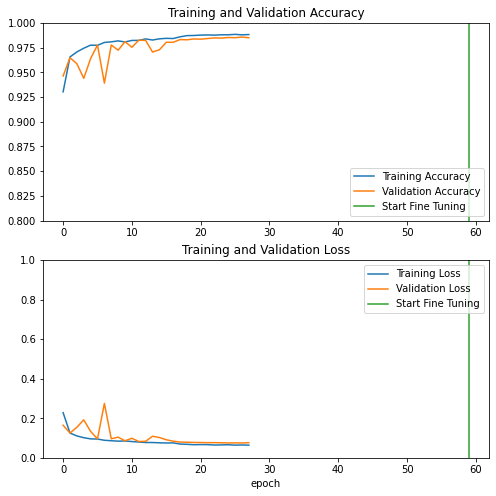

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([60-1,60-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([60-1,60-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
def get_predictions(generator,model):
	test_steps_per_epoch = np.math.ceil(generator.samples / generator.batch_size)
	predictions = model.predict_generator(generator, steps=test_steps_per_epoch)
	predictions = [i[0] for i in predictions]
	predictions = np.array(predictions)
	return predictions


def prediction_report(predictions,generator,cutoff,chatter=False):
	predicted_classes = np.copy(predictions)
	predicted_classes[predicted_classes>cutoff] = 1.0
	predicted_classes[predicted_classes<cutoff] = 0.0 
	true_classes = generator.classes
	N_ring = len(np.where(true_classes>0.5)[0])
	N_normal = len(np.where(true_classes<0.5)[0])
	tn, fp, fn, tp = confusion_matrix(true_classes,predicted_classes).ravel()
	matrix = confusion_matrix(true_classes,predicted_classes)
	if chatter:
		print('True Normal predictions: {} | ({} percent)'.format(tn,(tn * 100)/N_normal))
		print('True Ring predictions: {} | ({} percent)'.format(tp,(tp * 100)/N_ring))
		print('False Normal predictions (actually Ring): {} | ({} percent)'.format(fn,(fn * 100)/N_ring))
		print('False Ring predictions (actually Normal): {} | ({} percent)'.format(fp,(fp * 100)/N_normal))
	return(tn, fp, fn, tp)

def MCC(theta):
	tn, fp, fn, tp = theta
	numerator = (tp*tn) - (fp*fn)
	denomenator = np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
	MCC = numerator / denomenator
	return MCC

def AUC(predictions,generator):
	thresholds = np.linspace(0.0,1,20)
	tprs = []
	fprs = []
	for i in thresholds:
		tn, fp, fn, tp = prediction_report(predictions,generator,cutoff=i,chatter=False)
		TPR = tp / (fn+tp)
		FPR = fp / (fp+tn)
		tprs.append(TPR)
		fprs.append(FPR)
	tprs = np.array(tprs)[::-1]
	fprs = np.array(fprs)[::-1]
	plt.plot(fprs,tprs)
	plt.plot([0,1],[0,1],'k')
	area = np.trapz(tprs,x=fprs)
	print("Area under the curve: {}".format(area))
	return area


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


True Normal predictions: 110 | (87.3015873015873 percent)
True Ring predictions: 98 | (91.58878504672897 percent)
False Normal predictions (actually Ring): 9 | (8.411214953271028 percent)
False Ring predictions (actually Normal): 16 | (12.698412698412698 percent)
MCC:  0.7864575044979656
Area under the curve: 0.9415146120753597


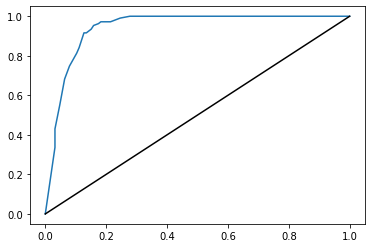

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = get_predictions(confirmation_generator,model)
theta = prediction_report(predictions,confirmation_generator,cutoff=0.5,chatter=True)
mcc = MCC(theta)
print('MCC: ',mcc)
area_under_curve = AUC(predictions,confirmation_generator)
#print(area_under_curve)

In [ ]:
model.save("/content/drive/MyDrive/ConvBlockBnewdatgan")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ConvBlockBnewdatgan/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ConvBlockBnewdatgan/assets


Applying Model on Unclassified Data

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

m = tf.keras.Sequential([hub.KerasLayer("/content/drive/MyDrive/ConvBlockBnewdatgan", trainable=True)])
m.build([None, 256, 256, 3])
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1)                 55124193  
                                                                 
Total params: 55,124,193
Trainable params: 55,063,649
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
model = m

Mounting Onedrive

In [ ]:
!wget https://downloads.rclone.org/v1.50.1/rclone-v1.50.1-linux-amd64.deb
!apt install ./rclone-v1.50.1-linux-amd64.deb

--2022-07-19 01:38:59--  https://downloads.rclone.org/v1.50.1/rclone-v1.50.1-linux-amd64.deb
Resolving downloads.rclone.org (downloads.rclone.org)... 5.153.250.7, 2a02:24e0:8:61f9::1
Connecting to downloads.rclone.org (downloads.rclone.org)|5.153.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11917114 (11M) [application/vnd.debian.binary-package]
Saving to: ‘rclone-v1.50.1-linux-amd64.deb’

rclone-v1.50.1-linu 100%[===================>]  11.36M  12.2MB/s    in 0.9s    

2022-07-19 01:39:01 (12.2 MB/s) - ‘rclone-v1.50.1-linux-amd64.deb’ saved [11917114/11917114]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'rclone' instead of './rclone-v1.50.1-linux-amd64.deb'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  rclone
0 upgraded, 1 newly installed, 0 to remov

In [ ]:
!rclone config

2022/07/19 01:39:12 NOTICE: Config file "/root/.config/rclone/rclone.conf" not found - using defaults
No remotes found - make a new one
n) New remote
s) Set configuration password
q) Quit config
n/s/q> n
name> onedrive
Type of storage to configure.
Enter a string value. Press Enter for the default ("").
Choose a number from below, or type in your own value
 1 / 1Fichier
   \ "fichier"
 2 / Alias for an existing remote
   \ "alias"
 3 / Amazon Drive
   \ "amazon cloud drive"
 4 / Amazon S3 Compliant Storage Provider (AWS, Alibaba, Ceph, Digital Ocean, Dreamhost, IBM COS, Minio, etc)
   \ "s3"
 5 / Backblaze B2
   \ "b2"
 6 / Box
   \ "box"
 7 / Cache a remote
   \ "cache"
 8 / Citrix Sharefile
   \ "sharefile"
 9 / Dropbox
   \ "dropbox"
10 / Encrypt/Decrypt a remote
   \ "crypt"
11 / FTP Connection
   \ "ftp"
12 / Google Cloud Storage (this is not Google Drive)
   \ "google cloud storage"
13 / Google Drive
   \ "drive"
14 / Google Photos
   \ "google photos"
15 / Hubic
   \ "hubic"
16 

In [ ]:
!sudo mkdir /content/onedrive
!nohup rclone --vfs-cache-mode writes mount onedrive: /content/onedrive &

nohup: appending output to 'nohup.out'


Test on Real Data

In [ ]:
import shutil

In [ ]:
!unzip /content/onedrive/DATA_PS1.zip -d /content/apply_data

In [ ]:
!unzip /content/SimResize-20220720T222206Z-001.zip -d /content/apply_data

In [ ]:
import shutil
shutil.move('/content/drive/MyDrive/SimResize', '/content/new_data')

'/content/new_data/SimResize'

In [ ]:
import os
len(os.listdir('/content/drive/MyDrive/SimResize (1)'))

0

In [ ]:
len(os.listdir('/content/new_data/NewSim'))

5602

In [ ]:
import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
correctRing = 0
incorrectRing = 0
correctNormal = 0
incorrectNormal = 0
y_true = []
y_pred = []
y_score = []
classifications = []
correctRing_img = []
correctNormal_img = []
i = 0
#Go through files in folder
for subdir, dirs, files in os.walk('/content/new_data/SimResize'):
    for file in files:
        filepath = subdir + os.sep + file
        #If file is image, apply model
        if filepath.endswith(".png"):
              try:
                galaxy_path = filepath
                img = tf.keras.preprocessing.image.load_img(galaxy_path, target_size=(256, 256, 3))
                input_arr = tf.keras.preprocessing.image.img_to_array(img)
                input_arr = np.array([input_arr])  # Convert single image to a batch.
                input_arr = input_arr.astype('float32') / 255.
                preds = model.predict(input_arr)
                print(preds)
                #Check probability, and see if it meets criteria; if so, append to ring dataset
                if (preds[0][0] > 0.95):
                  correctRing_img.append(filepath)
                else:
                  correctNormal_img.append(filepath)
                print(i)
              except:
                print(0)
              i += 1

Streaming output truncated to the last 5000 lines.
[[3.762249e-05]]
7330
[[0.01100648]]
7331
[[1.04069695e-05]]
7332
[[8.846474e-06]]
7333
[[0.03893529]]
7334
[[1.1077035e-05]]
7335
[[8.842662e-05]]
7336
[[5.9933004e-06]]
7337
[[1.2052134e-05]]
7338
[[0.00012721]]
7339
[[0.00967794]]
7340
[[0.06385498]]
7341
[[0.00017286]]
7342
[[9.074268e-06]]
7343
[[0.7712506]]
7344
[[6.6565343e-07]]
7345
[[4.6442337e-06]]
7346
[[1.0894285e-05]]
7347
[[6.270338e-05]]
7348
[[6.9994917e-06]]
7349
[[2.08181e-05]]
7350
[[1.1017256e-06]]
7351
[[2.1893256e-05]]
7352
[[0.9998627]]
7353
[[6.2058076e-05]]
7354
[[5.92307e-06]]
7355
[[3.9335984e-05]]
7356
[[4.34716e-06]]
7357
[[1.4833898e-05]]
7358
[[0.8859423]]
7359
[[8.824784e-06]]
7360
[[1.4446025e-05]]
7361
[[0.27378905]]
7362
[[4.734974e-05]]
7363
[[1.3028505e-05]]
7364
[[2.4414969e-05]]
7365
[[0.24454074]]
7366
[[6.1383416e-06]]
7367
[[0.0033323]]
7368
[[1.5086659e-05]]
7369
[[0.48990077]]
7370
[[0.65318286]]
7371
[[1.0606014e-05]]
7372
[[0.5440703]]
7373

In [ ]:
print(len(correctRing_img))

30


In [ ]:
print(len(correctNormal_img))

687073


In [ ]:
print(correctRing_img)

['/content/apply_data/DATA_PS1/649357.jpg', '/content/apply_data/DATA_PS1/759196.jpg', '/content/apply_data/DATA_PS1/39232.jpg', '/content/apply_data/DATA_PS1/639479.jpg', '/content/apply_data/DATA_PS1/43924.jpg', '/content/apply_data/DATA_PS1/67193.jpg', '/content/apply_data/DATA_PS1/105701.jpg', '/content/apply_data/DATA_PS1/213403.jpg', '/content/apply_data/DATA_PS1/182369.jpg', '/content/apply_data/DATA_PS1/1660424.jpg', '/content/apply_data/DATA_PS1/126746.jpg', '/content/apply_data/DATA_PS1/430768.jpg', '/content/apply_data/DATA_PS1/307941.jpg', '/content/apply_data/DATA_PS1/1617997.jpg', '/content/apply_data/DATA_PS1/1671821.jpg', '/content/apply_data/DATA_PS1/125787.jpg', '/content/apply_data/DATA_PS1/1476561.jpg', '/content/apply_data/DATA_PS1/461021.jpg', '/content/apply_data/DATA_PS1/1668022.jpg', '/content/apply_data/DATA_PS1/1627582.jpg', '/content/apply_data/DATA_PS1/391185.jpg', '/content/apply_data/DATA_PS1/1679618.jpg', '/content/apply_data/DATA_PS1/403931.jpg', '/cont

In [ ]:
/content/apply_data/101331.png

In [ ]:
len(os.listdir('/content/apply_data/SimResize'))

2819

In [ ]:
import shutil

for i in range(len(correctRing_img)):
  original = r'%s' % correctRing_img[i]
  x = correctRing_img[i].replace('/content/new_data/SimResize/', '')
  target = r'/content/drive/MyDrive/SimulatedRings/' + x
  shutil.copyfile(original, target)

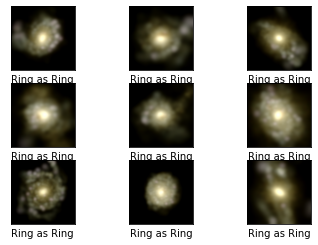

In [ ]:
import random
random.shuffle(correctRing_img)
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  img = keras.preprocessing.image.load_img(correctRing_img[i], target_size=(256, 256))
  plt.grid(False)
  plt.imshow(img)
  plt.xlabel("Ring as Ring")
plt.show()

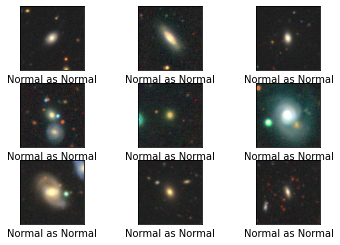

In [ ]:
random.shuffle(correctNormal_img)
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  img = keras.preprocessing.image.load_img(correctNormal_img[i], target_size=(256, 256))
  plt.grid(False)
  plt.imshow(img)
  plt.xlabel("Normal as Normal")
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.515204 to fit



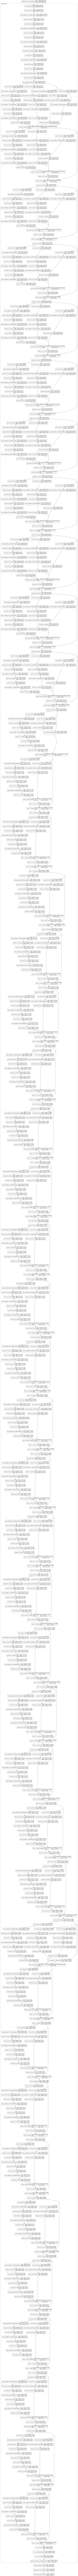

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested = True)